<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-load-and-prep" data-toc-modified-id="Data-load-and-prep-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data load and prep</a></span></li><li><span><a href="#How-many-total-unique-words-are-in-the-corpus?" data-toc-modified-id="How-many-total-unique-words-are-in-the-corpus?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How many total unique words are in the corpus?</a></span></li><li><span><a href="#Taking-the-most-common-words,-how-many-unique-words-represent-half-of-the-total-words-in-the-corpus?" data-toc-modified-id="Taking-the-most-common-words,-how-many-unique-words-represent-half-of-the-total-words-in-the-corpus?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Taking the most common words, how many unique words represent half of the total words in the corpus?</a></span></li><li><span><a href="#Identify-the-200-highest-frequency-words-in-this-corpus" data-toc-modified-id="Identify-the-200-highest-frequency-words-in-this-corpus-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Identify the 200 highest frequency words in this corpus</a></span></li><li><span><a href="#Create-a-graph-that-shows-the-relative-frequency-of-these-200-words." data-toc-modified-id="Create-a-graph-that-shows-the-relative-frequency-of-these-200-words.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create a graph that shows the relative frequency of these 200 words.</a></span></li><li><span><a href="#Does-the-observed-relative-frequency-of-these-words-follow-Zipf’s-law?-Explain." data-toc-modified-id="Does-the-observed-relative-frequency-of-these-words-follow-Zipf’s-law?-Explain.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Does the observed relative frequency of these words follow Zipf’s law? Explain.</a></span></li><li><span><a href="#In-what-ways-do-you-think-the-frequency-of-the-words-in-this-corpus-differ-from-“all-words-in-all-corpora.”" data-toc-modified-id="In-what-ways-do-you-think-the-frequency-of-the-words-in-this-corpus-differ-from-“all-words-in-all-corpora.”-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”</a></span></li></ul></div>

### Introduction

For this assignment, ["The Call of the Wild", by Jack London,](http://www.gutenberg.org/ebooks/215) was downloaded from "Project Gutenberg" to use as the corpus.  The corpus was analyzed to share the following information...

1. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
2. Taking the most common words, how many unique words represent half of the total words in the corpus?
3. Identify the 200 highest frequency words in this corpus.
4. Create a graph that shows the relative frequency of these 200 words.
5. Does the observed relative frequency of these words follow Zipf’s law? Explain.
6. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### Data load and prep

In [17]:
import nltk
from bs4 import BeautifulSoup

from string import punctuation
from collections import defaultdict
import operator
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set the working directory
#%cd C:\Users\user\Documents\00_Applications_DataScience\CUNY\DATA620\KJW_CUNY_DATA_620\Week4_Part 2 (High Frequency Words)
    
%cd C:\Users\juggy\Documents\GitHub\Jagdish16\KJW_CUNY_DATA_620\Week4_Part 2 (High Frequency Words)  

C:\Users\juggy\Documents\GitHub\Jagdish16\KJW_CUNY_DATA_620\Week4_Part 2 (High Frequency Words)


In [7]:
#Load Call of the Wild from Gutenberg site
from urllib import request
url = "https://www.gutenberg.org/files/215/215-h/215-h.htm"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [8]:
#In looking thru the text the book starts after some preamble and there is more preamble after the book ends.
#We'll remove the preamble for our analysis and any html.
start_str = 'Buck did not read the newspapers'
start_index = raw.find(start_str)

book = raw[start_index:]

finish_str = 'which is the song of the pack.'
finish_index = book.find(finish_str) + len(finish_str)

book = book[:finish_index]

#Remove html characters and punctuation
book = BeautifulSoup(book, 'html.parser').get_text()

In [9]:
print(book[0:283])

Buck did not read the newspapers, or he would have known that trouble was
brewing, not alone for himself, but for every tide-water dog, strong of muscle
and with warm, long hair, from Puget Sound to San Diego. Because men, groping
in the Arctic darkness, had found a yellow metal,


In [10]:
print(book[-330:])

. When the long winter nights come on and the wolves
follow their meat into the lower valleys, he may be seen running at the head of
the pack through the pale moonlight or glimmering borealis, leaping gigantic
above his fellows, his great throat a-bellow as he sings a song of the younger
world, which is the song of the pack.


In [11]:
#Split the book into a list of all lower case words and remove punctuation
book_list = [w.lower() for w in book.split()]

temp_list = []
for w in book_list:
    for p in punctuation:
        if p in w:
            w = str(w).replace(p,'')
    temp_list.append(w)

book_list = temp_list

In [12]:
#Book's first ten and last 10 words with HTML and punctuation removed
print(f'First 10 words {book_list[0:10]}')
print(f'Last 10 words {book_list[-10:]}')

First 10 words ['buck', 'did', 'not', 'read', 'the', 'newspapers', 'or', 'he', 'would', 'have']
Last 10 words ['the', 'younger', 'world', 'which', 'is', 'the', 'song', 'of', 'the', 'pack']


### How many total unique words are in the corpus?

In [13]:
# Check for unique words
book_list = sorted(book_list)
book_set = sorted(set(book_list))
print(f'Total unique words in the corpus are {len(book_set)}')

Total unique words in the corpus are 5022


In [14]:
# Calculate the frequency distribution of words
fdist = nltk.FreqDist(book_list)
fdist

FreqDist({'the': 2259, 'and': 1529, 'of': 866, 'he': 813, 'was': 697, 'to': 675, 'a': 654, 'his': 559, 'in': 537, 'it': 367, ...})

### Taking the most common words, how many unique words represent half of the total words in the corpus?

In [54]:
# Calculate the number of unique words that make up 50% of the total words
totalwords=len(book_list)
tcount=0
wcount=0
for word, count in fdist.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(totalwords/2):
        print(wcount)
        break

63


In [20]:
#Get the total and half total words in the book
total_words = len(book_list)
half_total_words = total_words/2
print(f'Total words in the book are {total_words} and half of that amount is {half_total_words}')

Total words in the book are 31737 and half of that amount is 15868.5


In [21]:
#Count how many times a word occurs and store in a dictionary sorted in descending order by word count
word_count_dict = defaultdict(int)

for w in book_list:
    if w not in word_count_dict.keys():
        word_count_dict[w] = 1
    else:
        word_count_dict[w] = int(word_count_dict.get(w)) + 1

word_count_dict_sorted = sorted(word_count_dict.items(),key=operator.itemgetter(1),reverse=True)

In [22]:
#Loop through the values and sum them up until sum > half total words
dict_sum = 0
dict_int = 0

for k, v in word_count_dict_sorted:
    if dict_sum < half_total_words:
        dict_sum= dict_sum + int(v)
        dict_int +=1

print(f'{dict_int} unique words represent half the total words in the corpus')
print()
print(f'The {dict_int} unique words are {word_count_dict_sorted[0:63]}')

63 unique words represent half the total words in the corpus

The 63 unique words are [('the', 2259), ('and', 1529), ('of', 866), ('he', 813), ('was', 697), ('to', 675), ('a', 654), ('his', 559), ('in', 537), ('it', 367), ('buck', 306), ('with', 304), ('that', 302), ('him', 288), ('they', 285), ('had', 274), ('as', 256), ('for', 235), ('on', 225), ('were', 217), ('at', 207), ('but', 197), ('not', 184), ('by', 160), ('from', 151), ('them', 151), ('out', 137), ('into', 129), ('which', 124), ('their', 115), ('all', 112), ('down', 110), ('dogs', 109), ('when', 109), ('one', 108), ('or', 101), ('this', 101), ('up', 98), ('did', 97), ('man', 91), ('no', 91), ('so', 89), ('back', 85), ('thornton', 81), ('could', 80), ('upon', 79), ('an', 78), ('there', 78), ('through', 74), ('men', 73), ('more', 72), ('time', 72), ('day', 70), ('would', 69), ('made', 66), ('came', 65), ('life', 62), ('sled', 60), ('be', 59), ('spitz', 59), ('over', 58), ('who', 57), ('like', 56)]


### Identify the 200 highest frequency words in this corpus

In [23]:
#Using the dictionary from question 4
highest_freq_words = word_count_dict_sorted[0:200]
print(f'The 200 highest frequency words are {highest_freq_words}')

The 200 highest frequency words are [('the', 2259), ('and', 1529), ('of', 866), ('he', 813), ('was', 697), ('to', 675), ('a', 654), ('his', 559), ('in', 537), ('it', 367), ('buck', 306), ('with', 304), ('that', 302), ('him', 288), ('they', 285), ('had', 274), ('as', 256), ('for', 235), ('on', 225), ('were', 217), ('at', 207), ('but', 197), ('not', 184), ('by', 160), ('from', 151), ('them', 151), ('out', 137), ('into', 129), ('which', 124), ('their', 115), ('all', 112), ('down', 110), ('dogs', 109), ('when', 109), ('one', 108), ('or', 101), ('this', 101), ('up', 98), ('did', 97), ('man', 91), ('no', 91), ('so', 89), ('back', 85), ('thornton', 81), ('could', 80), ('upon', 79), ('an', 78), ('there', 78), ('through', 74), ('men', 73), ('more', 72), ('time', 72), ('day', 70), ('would', 69), ('made', 66), ('came', 65), ('life', 62), ('sled', 60), ('be', 59), ('spitz', 59), ('over', 58), ('who', 57), ('like', 56), ('where', 56), ('dog', 55), ('never', 55), ('two', 55), ('while', 54), ('again'

In [28]:
# Select the 200 most frequent words and display in a tabular form
wordlist = []
for i in range(0, 200, 50):
    df = pd.DataFrame(fdist.most_common()[i:(i+50)])
    df.columns=['word', 'count']
    wordlist.append(df)

pd.concat(wordlist, axis=1)

,word,count,word,count,word,count,word,count
0,the,2259,more,72,about,36,wolf,26
1,and,1529,time,72,half,36,around,25
2,of,866,day,70,hundred,36,end,25
3,he,813,would,69,three,36,forest,25
4,was,697,made,66,first,35,go,25
5,to,675,came,65,only,35,such,25
6,a,654,life,62,after,34,dave,23
7,his,559,sled,60,perrault,34,even,23
8,in,537,be,59,side,34,nothing,23
9,it,367,spitz,59,before,33,own,23


### Create a graph that shows the relative frequency of these 200 words.

In [25]:
#Calculate the relative frequency
x = [w[0] for w in highest_freq_words]
y = [round((w[1]/total_words * 100),2) for w in highest_freq_words]

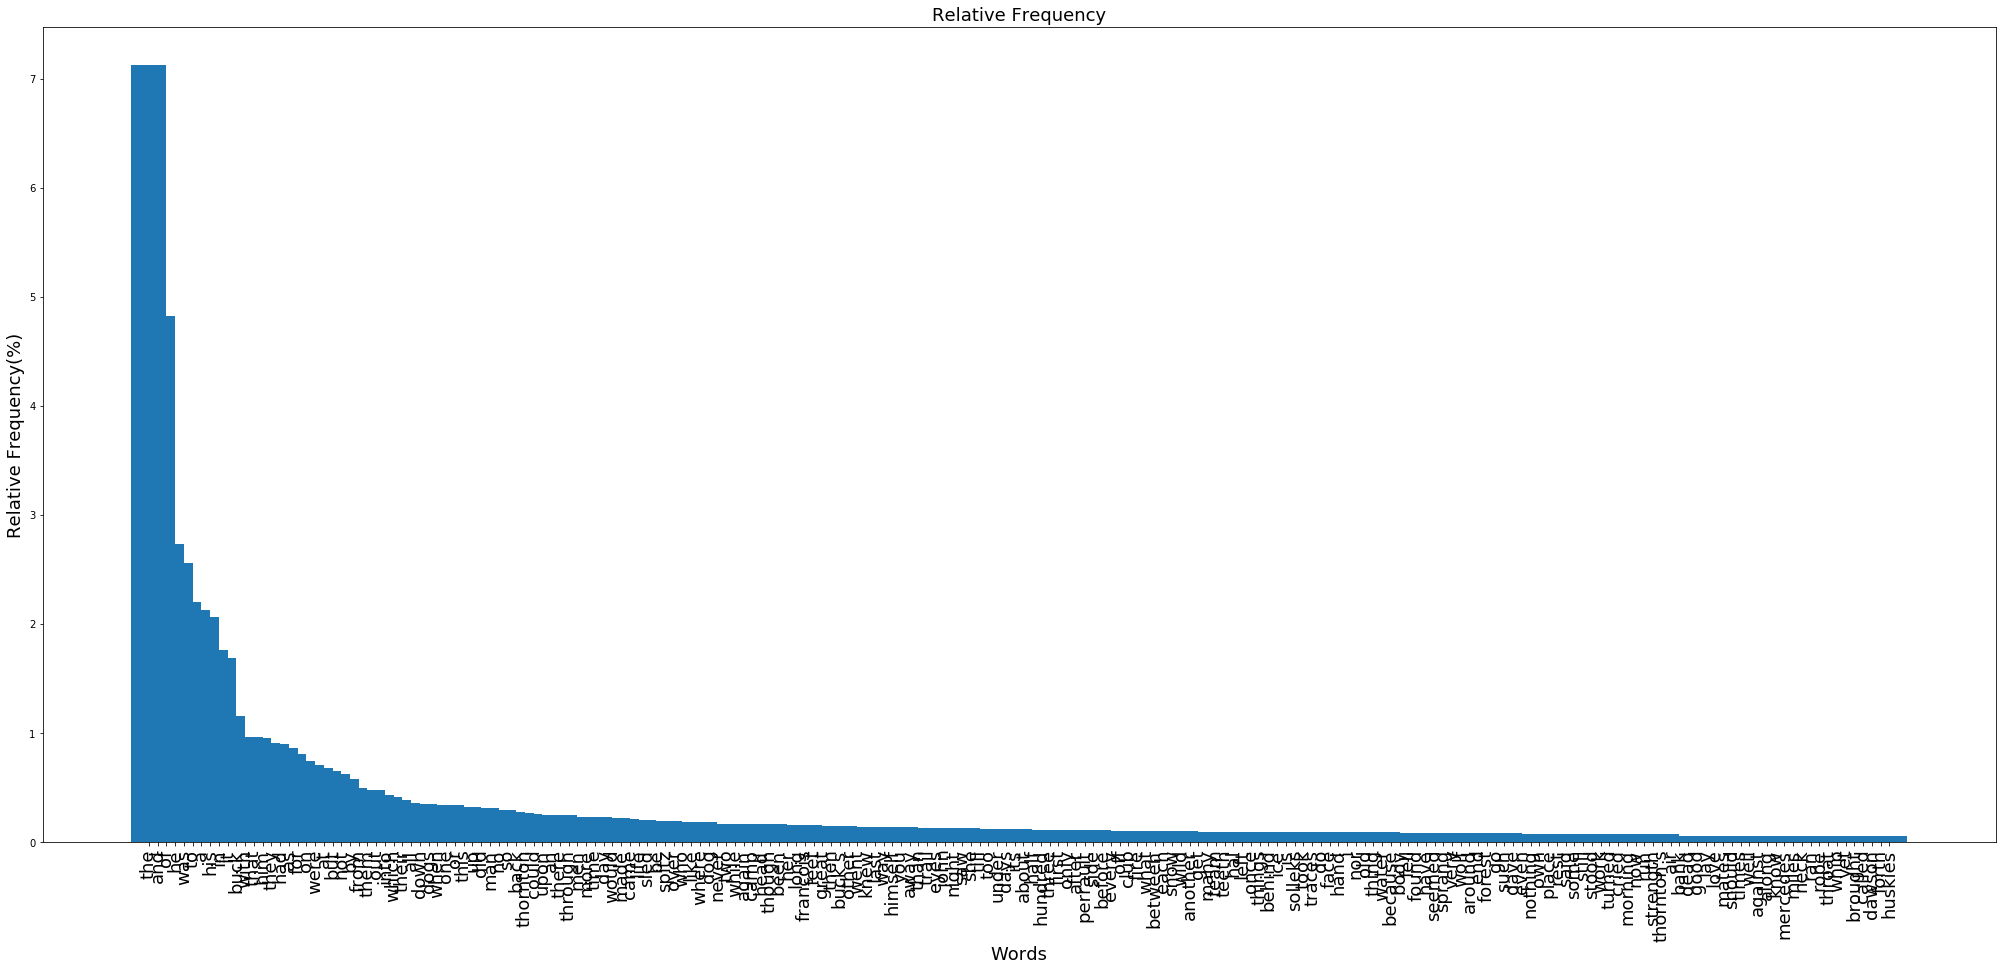

In [26]:
# Draw the graph
plt.figure(figsize=(35,15))
plt.title('Relative Frequency', fontsize=18)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Relative Frequency(%)', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.bar(x,y, width=4)
plt.show()

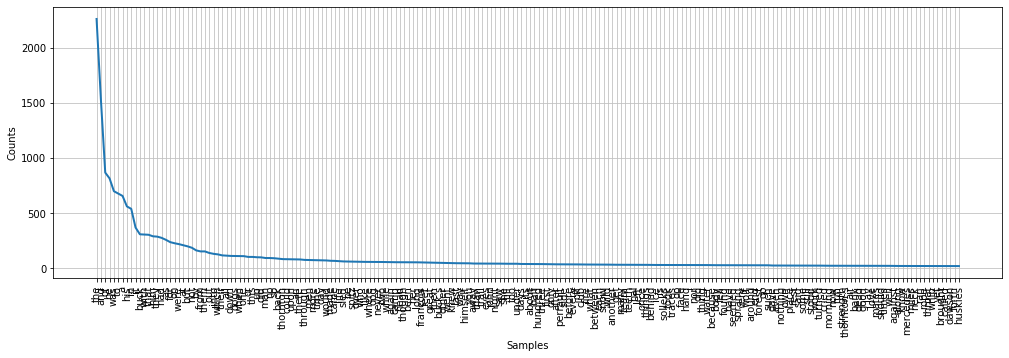

In [27]:
# Plot the same figure as a line plot using the fdist function
plt.figure(figsize=(17,5))
fdist.plot(200, )

### Does the observed relative frequency of these words follow Zipf’s law? Explain.


<I> Ziph's law </I> states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n. <br>

For example, if the most popular word occurs 100 times, the 2nd most popular word should appear 100 * 1/2 = 50 times, 3rd word 100 * 1/3 = 33 times, etc...

In [37]:
#Calculate Ziph's law values using the top 10 most frequent words
ten_words = word_count_dict_sorted[0:10]

words = [w[0] for w in ten_words]

actual_frequency = [w[1] for w in ten_words]

highest = ten_words[0][1]
ziphs_frequency = [round(highest * (1/(i+1))) for i, w in enumerate(actual_frequency)]

print(f'Actual frequency is {actual_frequency}')
print(f'Ziphs predicted frequency is {ziphs_frequency}')


Actual frequency is [2259, 1529, 866, 813, 697, 675, 654, 559, 537, 367]
Ziphs predicted frequency is [2259, 1130, 753, 565, 452, 376, 323, 282, 251, 226]


In [48]:
# Display the top 10 most frequenct words along with actual frequency
zipfs_df_10 = pd.DataFrame(fdist.most_common())[:10]
zipfs_df_10.columns=['Word', 'Actual Frequency']
zipfs_df_10                                    

,Word,Actual Frequency
0,the,2259
1,and,1529
2,of,866
3,he,813
4,was,697
5,to,675
6,a,654
7,his,559
8,in,537
9,it,367


In [53]:
# Calculate % difference between actual frequency and Zipf's predicted frequency for top 10 words
zipfs_df_10["Zipf's Expected Frequency"] = ziphs_frequency
zipfs_df_10['Difference'] = zipfs_df_10['Actual Frequency'] - zipfs_df_10["Zipf's Expected Frequency"]
zipfs_df_10['Percent Difference'] = round(((zipfs_df_10['Actual Frequency'] / zipfs_df_10["Zipf's Expected Frequency"])- 1) *100).astype(int)
zipfs_df_10

,Word,Actual Frequency,Zipf's Expected Frequency,Difference,Percent Difference
0,the,2259,2259,0,0
1,and,1529,1130,399,35
2,of,866,753,113,15
3,he,813,565,248,44
4,was,697,452,245,54
5,to,675,376,299,80
6,a,654,323,331,102
7,his,559,282,277,98
8,in,537,251,286,114
9,it,367,226,141,62


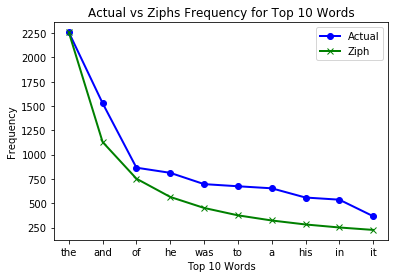

In [17]:
#Plot actual and Ziph's frequency values
plt.plot(words, actual_frequency, marker='o', color='blue', linewidth=2, label = 'Actual')
plt.plot(words, ziphs_frequency, marker='x', color='green', linewidth=2, label = 'Ziph')
plt.title('Actual vs Ziphs Frequency for Top 10 Words')
plt.ylabel('Frequency')
plt.xlabel('Top 10 Words')
plt.legend()
plt.show()

Our conclusion is that this corpus does not follow Ziph's law because the actual values are significantly higher than the expected values from Ziph's law.  Our theory is that this is due to the word count in this corpus being relatively small (approximately 32,000 words) compared to several online articles in which they used multiple corpus' to apply Ziph's law. 

### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


This corpus differs from "all words in all corpora" in the following ways... <br>
1. The total word count of roughly 32,000 words is less than many other popular corpora, such as the Bible.

2. Call of the Wild is an old book.  I wouldn't recommend this book for machine learning algorithms unless the objective is older texts.

3. This book seems rich in word variety with roughly 5,000 unique words in a total of 32,000, approximately a 1:6 ratio (though we didn't find a standard metric for this).

4. It only took 63 of 5,022 words (1.2%) to account for over half the words in the corpus. 